In [ ]:
pip install dimod

In [ ]:
from PIL import Image
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import dimod
import pickle
import re

In [ ]:
def convert_to_grayscale(image_path):
    # Загрузка изображения
    img = Image.open(image_path)

    # Преобразование изображения в оттенки серого
    gray_img = img.convert('L')

    # Конвертация изображения в черно-белое
    bw_img = gray_img.convert('1')

    return bw_img

def create_weighted_graph(bw_img):
    # Преобразование черно-белого изображения в массив numpy
    bw_array = np.array(bw_img, dtype=int)

    # Создание пустого графа
    G = nx.Graph()

    # Получение размеров изображения
    height, width = bw_array.shape

    # Добавление вершин и рёбер в граф
    for i in range(height):
        for j in range(width):
            intensity = bw_array[i, j]
            G.add_node((i, j), intensity=intensity)

            # Добавление рёбер между соседними пикселями
            if i > 0:
                diff = abs(intensity - bw_array[i - 1, j])
                G.add_edge((i, j), (i - 1, j), weight=diff)
            if j > 0:
                diff = abs(intensity - bw_array[i, j - 1])
                G.add_edge((i, j), (i, j - 1), weight=diff)

    return G

#Путь к картинке
image_path = '/content/1_small.png'

# Конвертация изображения в черно-белое
bw_image = convert_to_grayscale(image_path)

# Создание взвешенного графа на основе черно-белого изображения
weighted_graph = create_weighted_graph(bw_image)

# Теперь у нас есть взвешенный граф, каждая вершина которого содержит значение интенсивности серого пикселя,
# а рёбра представляют разность интенсивностей между соседними пикселями

# Вывод ширины и высоты изображения
print(f"Ширина изображения: {width} пикселей")
print(f"Высота изображения: {height} пикселей")

Ширина изображения: 60 пикселей
Высота изображения: 60 пикселей


<ipython-input-144-36cd047bbedc>:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Интенсивность серого')


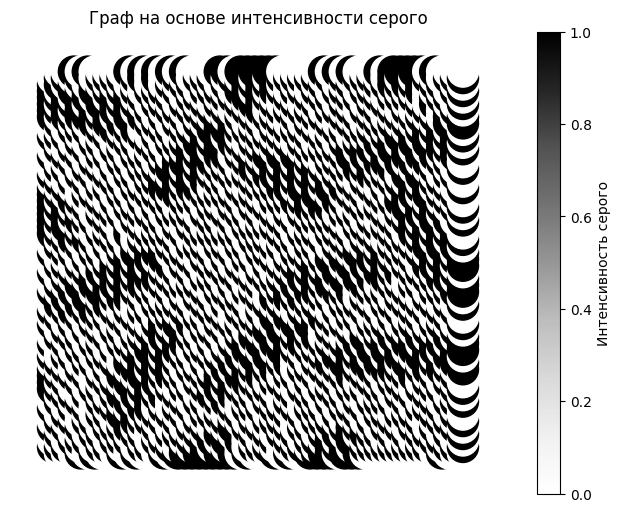

In [ ]:
# Рисование узлов
pos = {node: node for node in weighted_graph.nodes()}  # позиции вершин для отображения
node_colors = [weighted_graph.nodes[node]['intensity'] for node in weighted_graph.nodes()]  # цвета вершин

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(weighted_graph, pos, node_color=node_colors, cmap=plt.cm.Greys, node_size=500)
nx.draw_networkx_edges(weighted_graph, pos, alpha=0.5)  # рисование рёбер с некоторой прозрачностью
plt.title('Граф на основе интенсивности серого')

# Создание цветовой шкалы
sm = plt.cm.ScalarMappable(cmap=plt.cm.Greys)
sm.set_array(node_colors)
cbar = plt.colorbar(sm, label='Интенсивность серого')

plt.axis('off')

# Сохранение изображения графа

plt.savefig('graph_image.png')
plt.show()

In [ ]:
# Создание объекта BinaryQuadraticModel
bqm = dimod.BinaryQuadraticModel('BINARY')

# Добавление бинарных переменных для каждой вершины графа
for node in weighted_graph.nodes():
    bqm.add_variable(node, 0.0)  # 0.0 - значение по умолчанию

# Получение матрицы QUBO в формате NumPy с указанием порядка переменных
matrix = bqm.to_numpy_matrix(variable_order=list(bqm.variables))

# Вывод матрицы QUBO в формате NumPy
print(matrix)
np.savetxt('matrix.txt', matrix, fmt='%d')

# Сохранение матрицы в файл формата pk
with open('matrix.pk', 'wb') as file:
    pickle.dump(matrix, file)

<ipython-input-138-490263428f70>:9: DeprecationWarning: bqm.to_numpy_matrix() is deprecated since dimod 0.10.0 and will be removed in 0.12.0
  matrix = bqm.to_numpy_matrix(variable_order=list(bqm.variables))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [161]:
# Путь к файлу
file_path = '/content/1_small_500steps_out.txt'

# Открываем файл на чтение
with open(file_path, 'r') as file:
    content = file.read()  # Чтение содержимого файла

# Извлечение чисел после двоеточия (кроме последнего числа - энергии) с помощью регулярного выражения

numbers = re.findall(r': (\d+)', content)[:-1]  # Находим числа после двоеточия, исключая последнее

# Преобразование чисел в строку без пробелов
result_string = ''.join(numbers)

print(result_string)
print(len(result_string))

# Укажите путь для сохранения результата в файле формата txt
output_file_path = '/content/1_small_500steps_out_bin.txt'

# Сохранение результата в файл формата txt
with open(output_file_path, 'w') as output_file:
    output_file.write(result_string)

print(f"Строка чисел без пробелов сохранена в файл: {output_file_path}")

1110101111100101100010101000000110001000010100000101011101001110110111000101000111011101101000001001100111100010000100010100111010110100110011001110100011101110110110010010011011011010011111010010101001100101001110000001010011000111100111100101000100111100011001011000000111110000110000000000100011110010001111010100001010101110101100100100111001100101111001011111101010110110100000000110010101100001101100011110111101101110011001011110010111011001011101010001001011010010110101001101100110100000101110110001011111110110000011111110000101100100110100001101010100010011010010011010000111100011011110100101101011011011000101010011001011001100001011110010100100101111101110000000001111101001000101111010100110101011010100000101111110100010000011000000000010001010110110110000011000011111000101011111101110110110100001111111101010000010010010100101111010001011000010100111000111100101010111011101100001001011000111010000100101011001001001110011101110101111100000100110101011011000110000101011000111111111

In [162]:
# Проверка на соответствие количества элементов
if len(result_string) == width * height:

    # Разделение строки на подстроки
    chunks = [result_string[i:i + width] for i in range(0, len(result_string), width)]

    # Преобразование подстрок в новую матрицу
    new_matrix = []
    for chunk in chunks:
        values = [int(i) for i in chunk]
        new_matrix.append(values)

    # Вывод результата
    print("Новая матрица:")
    for row in new_matrix:
        print(row)

Новая матрица:
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
[1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]
[0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]
[0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1

In [163]:
# Пороговое значение (можете изменить при необходимости)
threshold = 0.9

# Преобраование матрицы в массив NumPy и умножение значения на 255 для кодирования черно-белых пикселей
matrix_array = np.array(new_matrix, dtype=np.float32) * 255

# Применение порогового значения для получения чёрно-белого изображения
binary_matrix = np.where(matrix_array > threshold * 255, 255, 0)

# Создание изображения на основе матрицы пикселей
image = Image.fromarray(binary_matrix.astype(np.uint8), mode='L')  # 'L' - режим оттенков серого (черно-белое изображение)

# Сохранение изображения
image.save('binary_image.png')

# Отобржение
image.show()